In [15]:
import pandas as pd
import utils as u
import seaborn as sns
import feature_generation as fg
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/gobel/code/research_env/data/BTCUSD_daily.csv', index_col='timestamp', parse_dates=True)
df = df.drop(['time', 'volumeto', 'conversionType', 'conversionSymbol'], axis=1)
df.columns = ['high', 'low', 'open', 'volume', 'close']
df['vwap'] = u.vwap(df)
df['returns'] = u.returns(df)
df['adv20'] = u.adv(df, 20)
df = df.dropna()
df.tail()

,high,low,open,volume,close,vwap,returns,adv20
timestamp,,,,,,,,
2021-02-07 01:00:00,39721.59,37408.16,39267.01,53823.40,38868.82,38868.82,-0.010141,68776.1285
2021-02-08 01:00:00,46606.82,38063.87,38868.82,138485.21,46437.41,46437.41,0.194721,73277.5165
2021-02-09 01:00:00,48209.59,45051.46,46437.41,98670.48,46509.57,46509.57,0.001554,74895.9395
2021-02-10 01:00:00,47349.86,43743.99,46509.57,72992.80,44854.95,44854.95,-0.035576,72266.2305
2021-02-11 01:00:00,48277.40,44032.66,44854.95,37370.65,47490.41,47490.41,0.058755,68674.2570


In [3]:
alphas = []

for n in range(30):
    name = 'alpha{}'.format(n+1)
    func = 'fg.{}'.format(name)
    temp_func = eval(func)
    df[name] = temp_func(df)

In [8]:
df = df.drop(['alpha1', 'alpha29'], axis=1)

<AxesSubplot:>

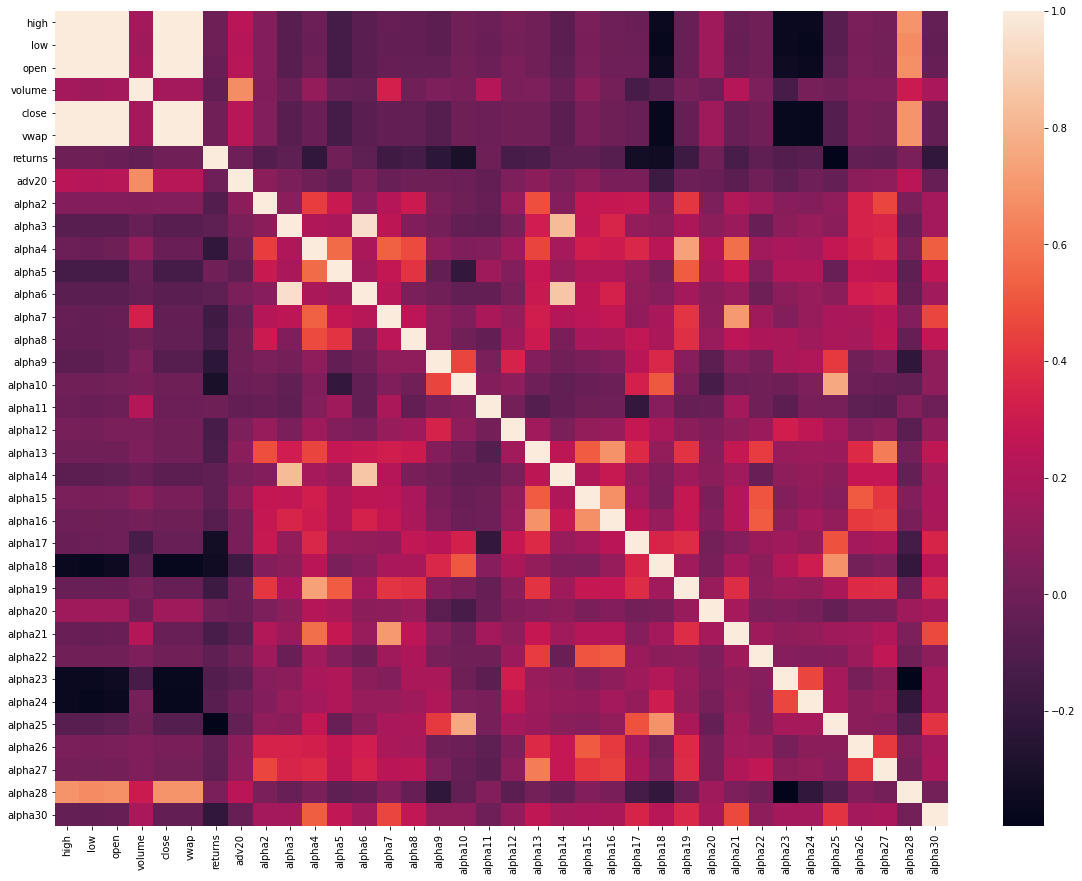

In [16]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), xticklabels=1, yticklabels=1)

array([[<AxesSubplot:title={'center':'high'}>,
        <AxesSubplot:title={'center':'low'}>,
        <AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'volume'}>],
       [<AxesSubplot:title={'center':'close'}>,
        <AxesSubplot:title={'center':'vwap'}>,
        <AxesSubplot:title={'center':'returns'}>,
        <AxesSubplot:title={'center':'adv20'}>],
       [<AxesSubplot:title={'center':'alpha2'}>,
        <AxesSubplot:title={'center':'alpha3'}>,
        <AxesSubplot:title={'center':'alpha4'}>,
        <AxesSubplot:title={'center':'alpha5'}>],
       [<AxesSubplot:title={'center':'alpha6'}>,
        <AxesSubplot:title={'center':'alpha7'}>,
        <AxesSubplot:title={'center':'alpha8'}>,
        <AxesSubplot:title={'center':'alpha9'}>],
       [<AxesSubplot:title={'center':'alpha10'}>,
        <AxesSubplot:title={'center':'alpha11'}>,
        <AxesSubplot:title={'center':'alpha12'}>,
        <AxesSubplot:title={'center':'alpha13'}>],
       [<AxesSubplot:

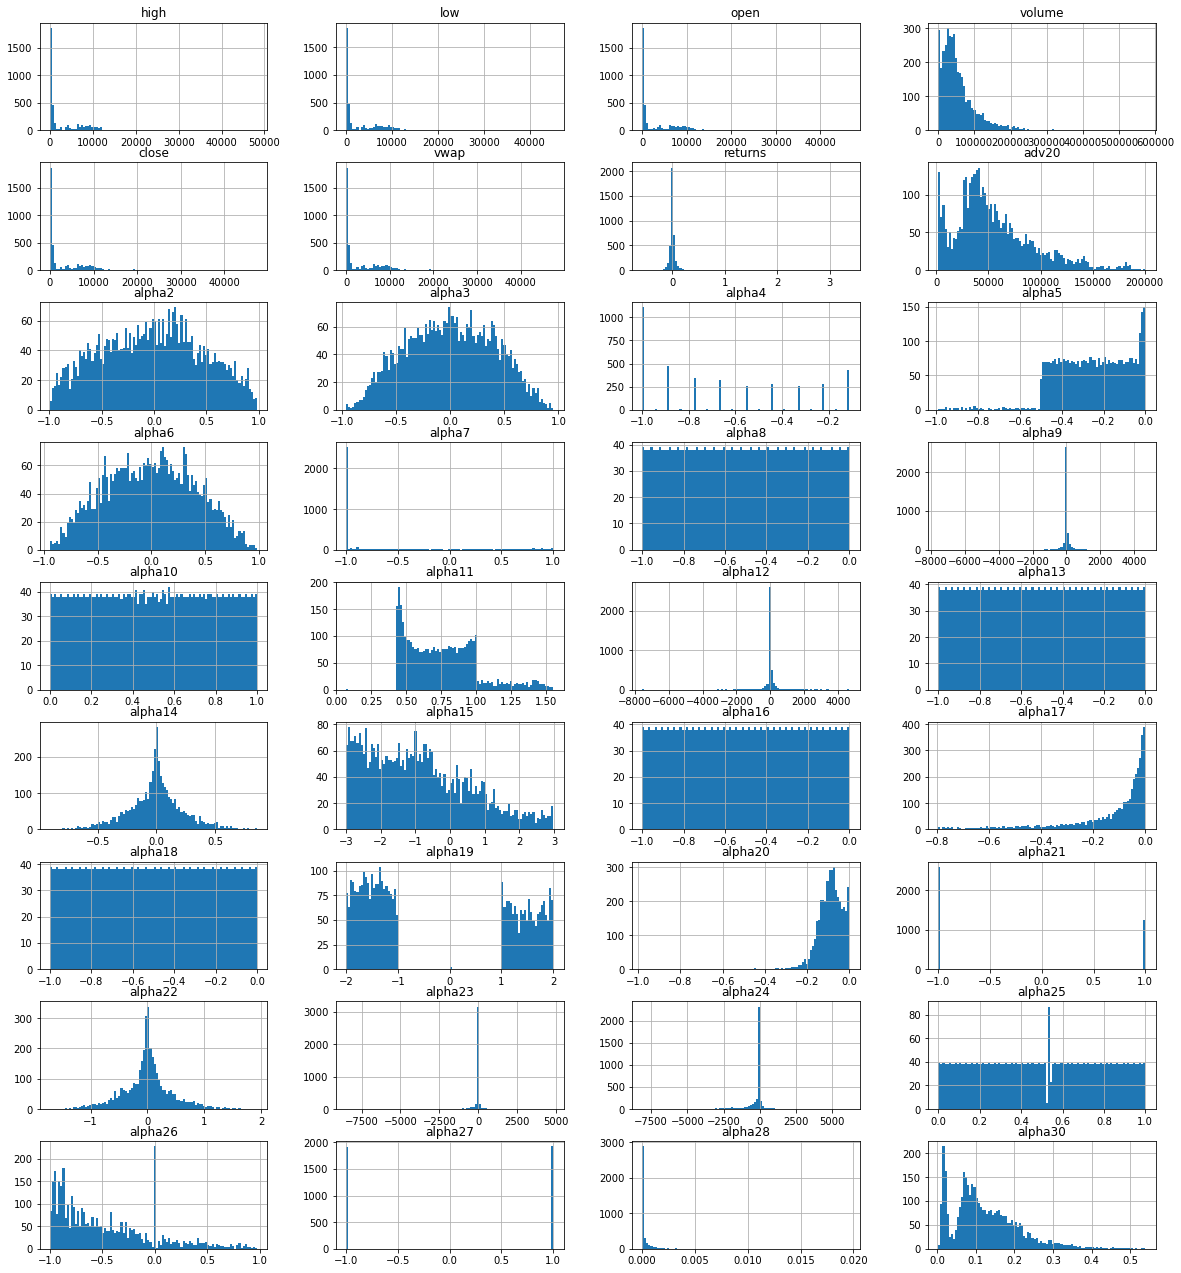

In [18]:
df.hist(bins=100,figsize=(20,74),layout=(29,4))

In [ ]:
fig, axes = plt.subplots(nrows=44
                         , ncols=3,figsize=(25,250))
for i, column in enumerate(df.columns):
    sns.distplot(df[column],ax=axes[i//3,i%3])